In [1]:
import os
import json
import glob
import random
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from PIL import Image 
import cv2
import pandas as pd

In [4]:
file = json.load(open('./Temp/textinthewild_data_info.json', encoding='UTF8'))
file.keys()

dict_keys(['info', 'images', 'annotations', 'licenses'])

In [27]:
signs = [f for f in file['images'] if f['type']=='traffic sign']
print(len(signs), '\n', signs[0])

26784 
 {'id': '00047089', 'width': 1920, 'height': 1440, 'file_name': '00024467863E82F72B18598125DAE6B5.jpg', 'type': 'traffic sign'}


[{'id': '01023246', 'image_id': '00047089', 'text': '기가', 'attributes': {'class': 'word'}, 'bbox': [566, 512, 172, 89]}, {'id': '01023247', 'image_id': '00047089', 'text': '인터넷', 'attributes': {'class': 'word'}, 'bbox': [774, 513, 261, 88]}]


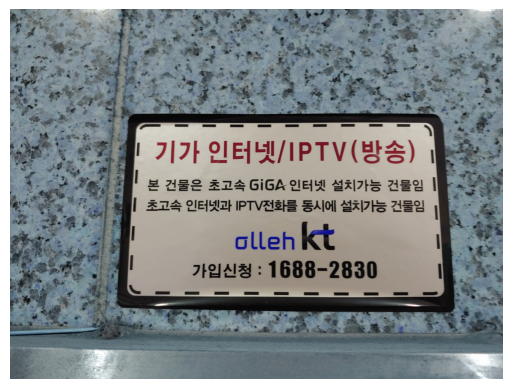

In [28]:
annotation = [a for a in file['annotations'] if a['image_id']==signs[0]['id'] and a['attributes']]
print(annotation[:2])

img = cv2.imread('./Traffic_Sign/'+signs[0]['file_name'])
plt.imshow(img)
plt.axis('off'); plt.show()

In [37]:
file_li = glob.glob('./Traffic_Sign/*.jpg')
new_file_li = file_li[:1000]
len(file_li), len(new_file_li)

(26784, 1000)

In [4]:
total_json = json.load(open('./Temp/textinthewild_data_info.json', encoding='UTF8'))
print(total_json.keys())
total_json['images'][:5], total_json['annotations'][:5]

dict_keys(['info', 'images', 'annotations', 'licenses'])


([{'id': '00000001',
   'width': 1920,
   'height': 1280,
   'file_name': '000B3F01755C15EF7A3F87779D8BBC8E.jpg',
   'type': 'book'},
  {'id': '00000002',
   'width': 1920,
   'height': 1440,
   'file_name': '001CE22A7E37B361021F33C1E2D14B86.jpg',
   'type': 'book'},
  {'id': '00000003',
   'width': 1920,
   'height': 1440,
   'file_name': '0020BFB5BEAB33D4E1864D17811B8B7D.jpg',
   'type': 'book'},
  {'id': '00000004',
   'width': 1920,
   'height': 1440,
   'file_name': '002505E194443D9267164C270A048FB7.jpg',
   'type': 'book'},
  {'id': '00000005',
   'width': 1920,
   'height': 1920,
   'file_name': '002B37DF2942A21616C9DDD3086000E4.jpg',
   'type': 'book'}],
 [{'id': '00000001',
   'image_id': '00000001',
   'text': '우',
   'attributes': {'class': 'character'},
   'bbox': [1006, 511, 78, 70]},
  {'id': '00000002',
   'image_id': '00000001',
   'text': '리',
   'attributes': {'class': 'character'},
   'bbox': [1087, 510, 65, 70]},
  {'id': '00000003',
   'image_id': '00000001',
   't

In [5]:
temp_files = [f.split('\\')[-1] for f in glob.glob('./temp_Sign/*')]
random.shuffle(temp_files)
train_files = temp_files[:800]
test_files = temp_files[800:]
len(temp_files), len(train_files), len(test_files)

(1000, 800, 200)

In [7]:
def create_json(total_json, img_files, file_name):
    temp_imgs = [imgs for imgs in total_json['images'] if imgs['file_name'] in img_files]
    temp_ids = [imgs['id'] for imgs in temp_imgs]
    temp_anno = [img_anno for img_anno in total_json['annotations'] if img_anno['image_id'] in temp_ids]
    temp_json = {'info': total_json['info'],
                 'images': temp_imgs,
                 'annotations': temp_anno}
    temp_anno = {'metainfo':{'dataset_type': 'TextDetDataset',
                             'task_name': 'textdet',
                             'category': [{'id':0, 'name':'text'}]},
                 'data_list':[]}
    for img in temp_json['images']:
        dic = {'img_path': img['file_name'],
               'height': img['height'],
               'width': img['width'],
               'instances': []
              }
        annos = [img_anno for img_anno in temp_json['annotations'] 
                     if img_anno['image_id']==img['id'] and img_anno['attributes']['class']!='character']
        for anno in annos:
            x,y,w,h = anno['bbox']
            new_anno = {'bbox': [x,y,x+w,y+h],
                        'bbox_label': 0,
                        'polygon': [x,y,x+w,y,x+w,y+h,x,y+h],
                        'text': anno['text'],
                        'ignore': False
                       }
            dic['instances'].append(new_anno)
        temp_anno['data_list'].append(dic)
    with open('./Temp/'+file_name, 'w') as file:
        json.dump(temp_anno, file)
    
create_json(total_json, train_files, 'temp_train_annotation.json')
# create_json(total_json, valid_files, 'temp_valid_annotation.json')
create_json(total_json, test_files, 'temp_test_annotation.json')

In [8]:
train_anno = json.load(open('./Temp/temp_train_annotation.json', encoding='UTF8'))
# valid_anno = json.load(open('./Temp/temp_valid_annotation.json', encoding='UTF8'))
test_anno = json.load(open('./Temp/temp_test_annotation.json', encoding='UTF8'))
len(train_anno['data_list']), len(test_anno['data_list'])

(800, 200)

In [39]:
data_anno = json.load(open('./data_json/temp_data_annotation.json', encoding='UTF8'))
data_anno

{'metainfo': {'dataset_type': 'TextDetDataset',
  'task_name': 'textdet',
  'category': [{'id': 0, 'name': 'text'}]},
 'data_list': [{'img_path': '00024467863E82F72B18598125DAE6B5.jpg',
   'height': 1440,
   'width': 1920,
   'instances': [{'bbox': [566, 512, 738, 601],
     'bbox_label': 0,
     'polygon': [566, 512, 738, 512, 738, 601, 566, 601],
     'text': '기가',
     'ignore': False},
    {'bbox': [774, 513, 1035, 601],
     'bbox_label': 0,
     'polygon': [774, 513, 1035, 513, 1035, 601, 774, 601],
     'text': '인터넷',
     'ignore': False},
    {'bbox': [1089, 517, 1310, 592],
     'bbox_label': 0,
     'polygon': [1089, 517, 1310, 517, 1310, 592, 1089, 592],
     'text': 'IPTV',
     'ignore': False},
    {'bbox': [1371, 510, 1540, 601],
     'bbox_label': 0,
     'polygon': [1371, 510, 1540, 510, 1540, 601, 1371, 601],
     'text': '방송',
     'ignore': False},
    {'bbox': [876, 865, 1108, 937],
     'bbox_label': 0,
     'polygon': [876, 865, 1108, 865, 1108, 937, 876, 937],


In [9]:
train_anno = json.load(open('./Temp/temp_train_annotation.json', encoding='UTF8'))
test_anno = json.load(open('./Temp/temp_test_annotation.json', encoding='UTF8'))

In [4]:
def det2spott(anno, file_name):
    anno['metainfo']['dataset_type'] = 'TextSpotterDataset'
    anno['metainfo']['task_name'] = 'textspotter'
    with open('./Temp/'+file_name, 'w') as file:
        json.dump(anno, file)
        
det2spott(train_anno, 'spot_train_annotation.json')
det2spott(test_anno, 'spot_test_annotation.json')

In [5]:
spot_train_anno = json.load(open('./Temp/spot_train_annotation.json', encoding='UTF8'))
spot_test_anno = json.load(open('./Temp/spot_test_annotation.json', encoding='UTF8'))
spot_train_anno

{'metainfo': {'dataset_type': 'TextSpotterDataset',
  'task_name': 'textspotter',
  'category': [{'id': 0, 'name': 'text'}]},
 'data_list': [{'img_path': '00024467863E82F72B18598125DAE6B5.jpg',
   'height': 1440,
   'width': 1920,
   'instances': [{'bbox': [566, 512, 738, 601],
     'bbox_label': 0,
     'polygon': [566, 512, 738, 512, 738, 601, 566, 601],
     'text': '기가',
     'ignore': False},
    {'bbox': [774, 513, 1035, 601],
     'bbox_label': 0,
     'polygon': [774, 513, 1035, 513, 1035, 601, 774, 601],
     'text': '인터넷',
     'ignore': False},
    {'bbox': [1089, 517, 1310, 592],
     'bbox_label': 0,
     'polygon': [1089, 517, 1310, 517, 1310, 592, 1089, 592],
     'text': 'IPTV',
     'ignore': False},
    {'bbox': [1371, 510, 1540, 601],
     'bbox_label': 0,
     'polygon': [1371, 510, 1540, 510, 1540, 601, 1371, 601],
     'text': '방송',
     'ignore': False},
    {'bbox': [876, 865, 1108, 937],
     'bbox_label': 0,
     'polygon': [876, 865, 1108, 865, 1108, 937, 876

In [10]:
def det2recog(anno, file_name):
    anno['metainfo']['dataset_type'] = 'TextRecogDataset'
    anno['metainfo']['task_name'] = 'textrecog'
    anno['metainfo'].pop('category')
    data_list = anno['data_list']
    anno['data_list'] = []
    for img_dic in data_list:
        for i, bbox in enumerate(img_dic['instances']):
            dic = {'img_path': img_dic['img_path'].split('.')[0]+'_{}.jpg'.format(i)}
            dic['height'] = bbox['bbox'][3] - bbox['bbox'][1]
            dic['width'] = bbox['bbox'][2] - bbox['bbox'][0]
            dic['instances'] = [{'bbox_label': 0,
                                 'text': bbox['text']}]
            anno['data_list'].append(dic)
    
    with open('./Temp/'+file_name, 'w') as file:
        json.dump(anno, file)
        
det2recog(train_anno, 'recog_train_annotation.json')
det2recog(test_anno, 'recog_test_annotation.json')

In [11]:
recog_train_anno = json.load(open('./Temp/recog_train_annotation.json', encoding='UTF8'))
recog_test_anno = json.load(open('./Temp/recog_test_annotation.json', encoding='UTF8'))
print(len(recog_train_anno['data_list']), len(recog_test_anno['data_list']))
recog_train_anno

5954 1615


{'metainfo': {'dataset_type': 'TextRecogDataset', 'task_name': 'textrecog'},
 'data_list': [{'img_path': '00024467863E82F72B18598125DAE6B5_0.jpg',
   'height': 89,
   'width': 172,
   'instances': [{'bbox_label': 0, 'text': '기가'}]},
  {'img_path': '00024467863E82F72B18598125DAE6B5_1.jpg',
   'height': 88,
   'width': 261,
   'instances': [{'bbox_label': 0, 'text': '인터넷'}]},
  {'img_path': '00024467863E82F72B18598125DAE6B5_2.jpg',
   'height': 75,
   'width': 221,
   'instances': [{'bbox_label': 0, 'text': 'IPTV'}]},
  {'img_path': '00024467863E82F72B18598125DAE6B5_3.jpg',
   'height': 91,
   'width': 169,
   'instances': [{'bbox_label': 0, 'text': '방송'}]},
  {'img_path': '00024467863E82F72B18598125DAE6B5_4.jpg',
   'height': 72,
   'width': 232,
   'instances': [{'bbox_label': 0, 'text': 'olleh'}]},
  {'img_path': '00024467863E82F72B18598125DAE6B5_5.jpg',
   'height': 168,
   'width': 1104,
   'instances': [{'bbox_label': 0, 'text': None}]},
  {'img_path': '00024467863E82F72B18598125DA

In [5]:
total_json = json.load(open('./Temp/textinthewild_data_info.json', encoding='UTF8'))
temp_files = [f.split('\\')[-1] for f in glob.glob('./Temp/temp_Sign/*')]
random.shuffle(temp_files)
train_files = temp_files[:800]
test_files = temp_files[800:]

In [6]:
def create_det_json(total_json, img_files, file_name):
    temp_imgs = [imgs for imgs in total_json['images'] if imgs['file_name'] in img_files]
    temp_ids = [imgs['id'] for imgs in temp_imgs]
    temp_anno = [img_anno for img_anno in total_json['annotations'] if img_anno['image_id'] in temp_ids]
    temp_json = {'info': total_json['info'],
                 'images': temp_imgs,
                 'annotations': temp_anno}
    temp_anno = {'metainfo':{'dataset_type': 'TextDetDataset',
                             'task_name': 'textdet',
                             'category': [{'id':0, 'name':'text'}]},
                 'data_list':[]}
    for img in temp_json['images']:
        dic = {'img_path': img['file_name'],
               'height': img['height'],
               'width': img['width'],
               'instances': []
              }
        annos = [img_anno for img_anno in temp_json['annotations'] 
                     if img_anno['image_id']==img['id'] and img_anno['attributes']['class']=='word']
        for anno in annos:
            x,y,w,h = anno['bbox']
            new_anno = {'bbox': [x,y,x+w,y+h],
                        'bbox_label': 0,
                        'polygon': [x,y,x+w,y,x+w,y+h,x,y+h],
                        'text': anno['text'],
                        'ignore': False
                       }
            dic['instances'].append(new_anno)
        temp_anno['data_list'].append(dic)
    with open('./Temp/'+file_name, 'w') as file:
        json.dump(temp_anno, file)
    
create_det_json(total_json, train_files, 'det_train_annotation.json')
create_det_json(total_json, test_files, 'det_test_annotation.json')
det_train_anno = json.load(open('./Temp/det_train_annotation.json', encoding='UTF8'))
det_test_anno = json.load(open('./Temp/det_test_annotation.json', encoding='UTF8'))
print(len(det_train_anno['data_list']), len(det_test_anno['data_list']))
det_train_anno

800 200


{'metainfo': {'dataset_type': 'TextDetDataset',
  'task_name': 'textdet',
  'category': [{'id': 0, 'name': 'text'}]},
 'data_list': [{'img_path': '000D6985A1C98F0549F53FEE4FA556B8.jpg',
   'height': 1440,
   'width': 1920,
   'instances': [{'bbox': [1126, 426, 1287, 496],
     'bbox_label': 0,
     'polygon': [1126, 426, 1287, 426, 1287, 496, 1126, 496],
     'text': '28km',
     'ignore': False},
    {'bbox': [1178, 547, 1288, 615],
     'bbox_label': 0,
     'polygon': [1178, 547, 1288, 547, 1288, 615, 1178, 615],
     'text': '6km',
     'ignore': False},
    {'bbox': [1179, 661, 1288, 730],
     'bbox_label': 0,
     'polygon': [1179, 661, 1288, 661, 1288, 730, 1179, 730],
     'text': ' 6km',
     'ignore': False},
    {'bbox': [633, 619, 803, 715],
     'bbox_label': 0,
     'polygon': [633, 619, 803, 619, 803, 715, 633, 715],
     'text': '초월',
     'ignore': False},
    {'bbox': [635, 379, 818, 481],
     'bbox_label': 0,
     'polygon': [635, 379, 818, 379, 818, 481, 635, 481]

In [7]:
def det2recog(anno, file_name):
    anno['metainfo']['dataset_type'] = 'TextRecogDataset'
    anno['metainfo']['task_name'] = 'textrecog'
    anno['metainfo'].pop('category')
    data_list = anno['data_list']
    anno['data_list'] = []
    for img_dic in data_list:
        for i, bbox in enumerate(img_dic['instances']):
            if bbox['bbox'][3]==bbox['bbox'][1] or bbox['bbox'][2]==bbox['bbox'][0]:
                continue
            dic = {'img_path': img_dic['img_path'].split('.')[0]+'_{}.jpg'.format(i)}
            dic['height'] = bbox['bbox'][3] - bbox['bbox'][1]
            dic['width'] = bbox['bbox'][2] - bbox['bbox'][0]
            dic['instances'] = [{'bbox_label': 0,
                                 'text': bbox['text']}]
            anno['data_list'].append(dic)
    
    with open('./Temp/'+file_name, 'w') as file:
        json.dump(anno, file)
        
det2recog(det_train_anno, 'recog_train_annotation.json')
det2recog(det_test_anno, 'recog_test_annotation.json')

recog_train_anno = json.load(open('./Temp/recog_train_annotation.json', encoding='UTF8'))
recog_test_anno = json.load(open('./Temp/recog_test_annotation.json', encoding='UTF8'))
print(len(recog_train_anno['data_list']), len(recog_test_anno['data_list']))
recog_train_anno

2451 617


{'metainfo': {'dataset_type': 'TextRecogDataset', 'task_name': 'textrecog'},
 'data_list': [{'img_path': '000D6985A1C98F0549F53FEE4FA556B8_0.jpg',
   'height': 70,
   'width': 161,
   'instances': [{'bbox_label': 0, 'text': '28km'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_1.jpg',
   'height': 68,
   'width': 110,
   'instances': [{'bbox_label': 0, 'text': '6km'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_2.jpg',
   'height': 69,
   'width': 109,
   'instances': [{'bbox_label': 0, 'text': ' 6km'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_3.jpg',
   'height': 96,
   'width': 170,
   'instances': [{'bbox_label': 0, 'text': '초월'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_4.jpg',
   'height': 102,
   'width': 183,
   'instances': [{'bbox_label': 0, 'text': '동서울'}]},
  {'img_path': '001353D4CEF660E0C1F54B40FB4469B3_0.jpg',
   'height': 206,
   'width': 770,
   'instances': [{'bbox_label': 0, 'text': '해제'}]},
  {'img_path': '001353D4CEF660E0C1F54B40FB44

In [8]:
def det2spott(anno, file_name):
    anno['metainfo']['dataset_type'] = 'TextSpotterDataset'
    anno['metainfo']['task_name'] = 'textspotter'
    with open('./Temp/'+file_name, 'w') as file:
        json.dump(anno, file)
        
det2spott(det_train_anno, 'spot_train_annotation.json')
det2spott(det_test_anno, 'spot_test_annotation.json')
spot_train_anno = json.load(open('./Temp/spot_train_annotation.json', encoding='UTF8'))
spot_test_anno = json.load(open('./Temp/spot_test_annotation.json', encoding='UTF8'))
print(len(det_train_anno['data_list']), len(det_test_anno['data_list']))
spot_train_anno

2451 617


{'metainfo': {'dataset_type': 'TextSpotterDataset',
  'task_name': 'textspotter'},
 'data_list': [{'img_path': '000D6985A1C98F0549F53FEE4FA556B8_0.jpg',
   'height': 70,
   'width': 161,
   'instances': [{'bbox_label': 0, 'text': '28km'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_1.jpg',
   'height': 68,
   'width': 110,
   'instances': [{'bbox_label': 0, 'text': '6km'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_2.jpg',
   'height': 69,
   'width': 109,
   'instances': [{'bbox_label': 0, 'text': ' 6km'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_3.jpg',
   'height': 96,
   'width': 170,
   'instances': [{'bbox_label': 0, 'text': '초월'}]},
  {'img_path': '000D6985A1C98F0549F53FEE4FA556B8_4.jpg',
   'height': 102,
   'width': 183,
   'instances': [{'bbox_label': 0, 'text': '동서울'}]},
  {'img_path': '001353D4CEF660E0C1F54B40FB4469B3_0.jpg',
   'height': 206,
   'width': 770,
   'instances': [{'bbox_label': 0, 'text': '해제'}]},
  {'img_path': '001353D4CEF660E0C1F54B

In [14]:
f = open('./mmocr_custom/dicts/kor_digits2.txt', 'r', encoding='utf-8')
txt = f.read().split('\n')
f.close()

In [15]:
from collections import Counter
print(txt)
count = Counter(txt)
print(count)
for cha, c in count.items():
    if c!=1:
        print(cha, c)

[' ', '!', '\\', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '가', '각', '간', '갇', '갈', '감', '갑', '값', '강', '갖', '같', '갚', '갛', '개', '객', '걀', '거', '걱', '건', '걷', '걸', '검', '겁', '것', '겉', '게', '겨', '격', '겪', '견', '결', '겹', '경', '곁', '계', '고', '곡', '곤', '곧', '골', '곰', '곱', '곳', '공', '과', '관', '광', '괜', '괴', '굉', '교', '구', '국', '군', '굳', '굴', '굵', '굶', '굽', '궁', '권', '귀', '규', '균', '그', '극', '근', '글', '긁', '금', '급', '긋', '긍', '기', '긴', '길', '김', '깅', '깊', '까', '깎', '깐', '깔', '깜', '깝', '깥', '깨', '꺼', '꺾', '껍', '껏', '껑', '께', '껴', '꼬', '꼭', '꼴', '꼼', '꼽', '꽂', '꽃', '꽉', '꽤', '꾸